# Data cleaning & Preprocessing and EDA

In [2]:
# import all the lib
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data = pd.read_csv("C:\\Users\\Z BOOK\\Documents\\Machine Learning\\Titanic-Dataset.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data['Cabin'].value_counts()

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

In [8]:
data['Cabin'] = data['Cabin'].fillna('G6')
median_age = data['Age'].median()
data['Age'] = data['Age'].fillna(median_age)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [9]:
data=data.dropna()

In [10]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [11]:
data.duplicated().sum()

np.int64(0)

In [12]:
numeric_cols=data.select_dtypes(include=['int64','float64'])
outlier_list=[]
for col in numeric_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5 *IQR
    upper=Q3 + 1.5 *IQR
    x=(data[col]<lower)|(data[col]>upper)
    outlier_counts=x.sum()
    outlier_list.append((col,outlier_counts))
outlier_list

[('PassengerId', np.int64(0)),
 ('Survived', np.int64(0)),
 ('Pclass', np.int64(0)),
 ('Age', np.int64(65)),
 ('SibSp', np.int64(46)),
 ('Parch', np.int64(213)),
 ('Fare', np.int64(114))]

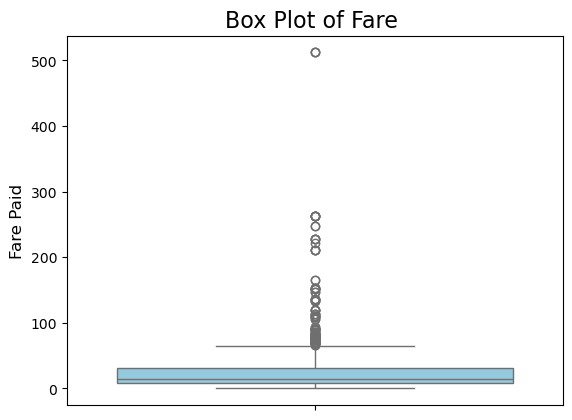

In [13]:
sns.boxplot(y=data['Fare'], color='skyblue')
plt.title('Box Plot of Fare ', fontsize=16)
plt.ylabel('Fare Paid', fontsize=12)
plt.show()

In [14]:
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR 
    upper_bound = Q3 + 1.5 * IQR
    data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)

In [15]:
numeric_cols=data.select_dtypes(include=['int64','float64'])
outlier_list=[]
for col in numeric_cols:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1 - 1.5 *IQR
    upper=Q3 + 1.5 *IQR
    x=(data[col]<lower)|(data[col]>upper)
    outlier_counts=x.sum()
    outlier_list.append((col,outlier_counts))
outlier_list

[('PassengerId', np.int64(0)),
 ('Survived', np.int64(0)),
 ('Pclass', np.int64(0)),
 ('Age', np.int64(0)),
 ('SibSp', np.int64(0)),
 ('Parch', np.int64(0)),
 ('Fare', np.int64(0))]

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    float64
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 90.3+ KB


In [17]:
survived_count = data['Survived'].value_counts()
survived_count

Survived
0    549
1    340
Name: count, dtype: int64

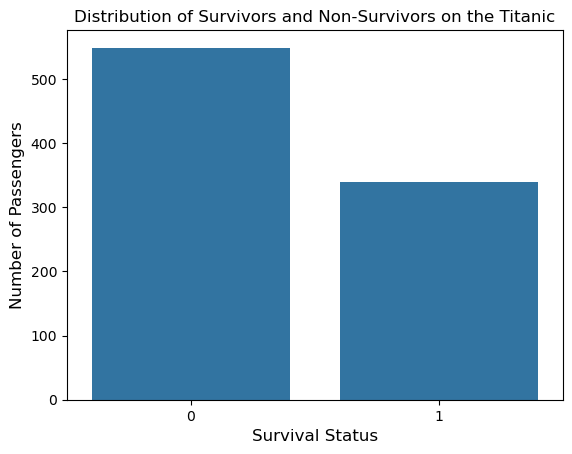

In [18]:
sns.countplot(x='Survived', data=data) 
plt.title('Distribution of Survivors and Non-Survivors on the Titanic', fontsize=12)
plt.xlabel('Survival Status', fontsize=12)
plt.ylabel('Number of Passengers', fontsize=12)
plt.show()

In [19]:
num_of_survived=data.groupby('Sex')['Survived'].sum().reset_index(name='num_of_survived')
num_of_survived

,Sex,num_of_survived
0,female,231
1,male,109


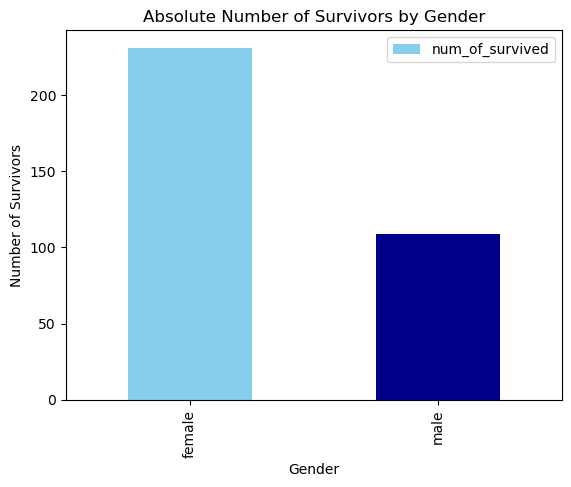

In [20]:
num_of_survived.plot(kind='bar', x='Sex', y='num_of_survived',color=['skyblue', 'darkblue'])
plt.title('Absolute Number of Survivors by Gender', fontsize=12)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Number of Survivors', fontsize=10)
plt.show()

C:\Users\Z BOOK\AppData\Local\Temp\ipykernel_22124\3202929789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')


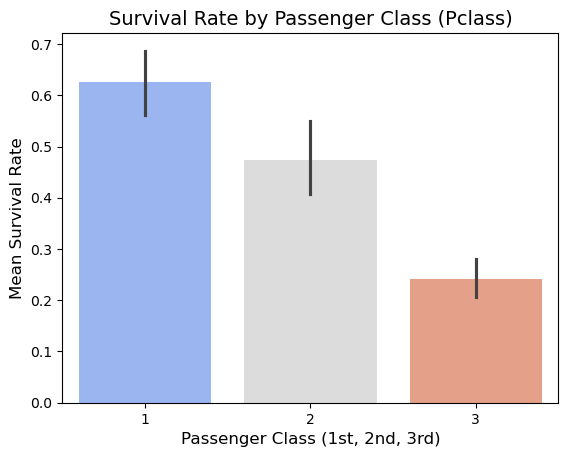

In [21]:
sns.barplot(x='Pclass', y='Survived', data=data, palette='coolwarm')
plt.title('Survival Rate by Passenger Class (Pclass)', fontsize=14)
plt.xlabel('Passenger Class (1st, 2nd, 3rd)', fontsize=12)
plt.ylabel('Mean Survival Rate', fontsize=12)
plt.show()

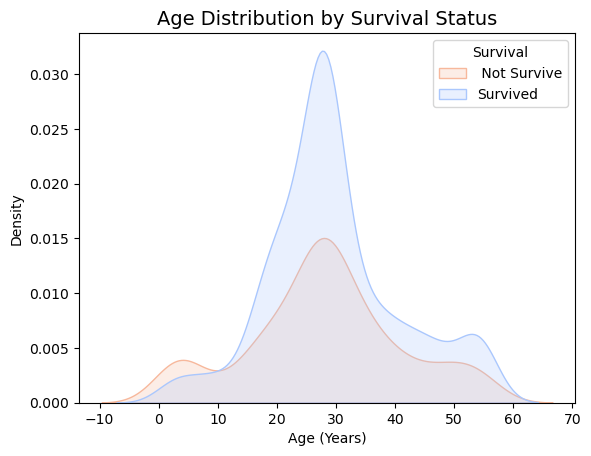

In [22]:
sns.kdeplot(x='Age', hue='Survived', data=data, fill=True, palette='coolwarm') 
plt.title('Age Distribution by Survival Status', fontsize=14)
plt.xlabel('Age (Years)')
plt.ylabel('Density')
plt.legend(title='Survival', labels=[' Not Survive', 'Survived'])
plt.show()

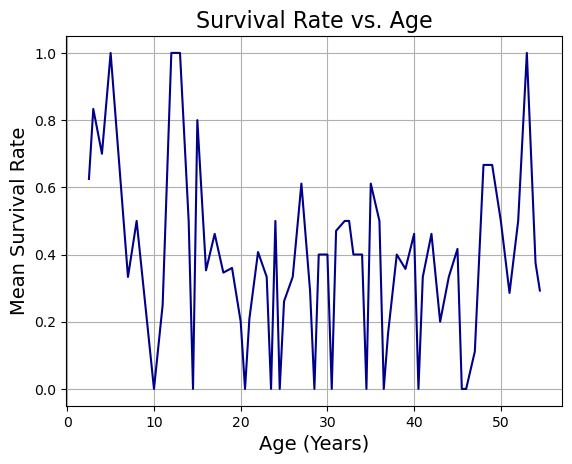

In [23]:
Age_Survival_Rate = data.groupby('Age')['Survived'].mean() 
Age_Survival_Rate.plot(kind='line', color='darkblue')
plt.title('Survival Rate vs. Age', fontsize=16)
plt.xlabel('Age (Years)', fontsize=14)
plt.ylabel('Mean Survival Rate', fontsize=14)
plt.grid(True)
plt.show()

In [24]:
Age_Survival = data.groupby('Age')['Survived'].sum().reset_index()
Age_Survival

,Age,Survived
0,2.5,15
1,3.0,5
2,4.0,7
3,5.0,4
4,6.0,2
...,...,...
60,51.0,2
61,52.0,3
62,53.0,1
63,54.0,3


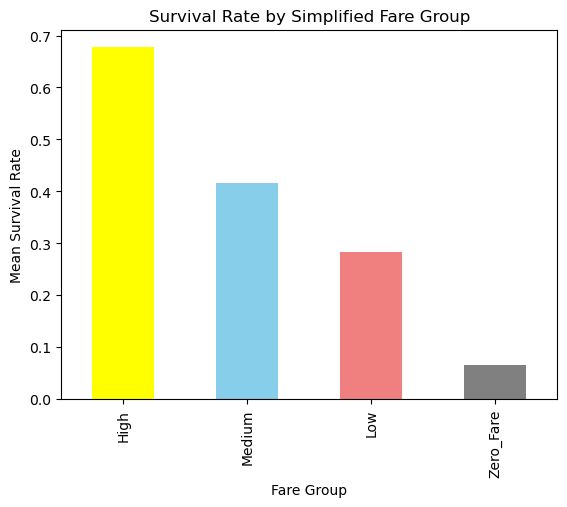

In [25]:
data['Fare_Simple'] = np.where(data['Fare'] > 50, 'High', 'Low')
data['Fare_Simple'] = np.where(data['Fare'] == 0, 'Zero_Fare', data['Fare_Simple'])
data['Fare_Simple'] = np.where((data['Fare'] > 20) & (data['Fare'] <= 50), 'Medium' , data['Fare_Simple'])
fare_survival_rate = data.groupby('Fare_Simple')['Survived'].mean().sort_values(ascending=False)
fare_survival_rate.plot(kind='bar', color=['yellow', 'skyblue', 'lightcoral', 'grey'])
plt.title('Survival Rate by Simplified Fare Group')
plt.xlabel('Fare Group')
plt.ylabel('Mean Survival Rate')
plt.show()

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    float64
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
 12  Fare_Simple  889 non-null    object 
dtypes: float64(3), int64(4), object(6)
memory usage: 97.2+ KB


In [27]:
from sklearn.preprocessing import LabelEncoder # i want 0 , 1 not  boolen
le=LabelEncoder()
data['Pclass']=le.fit_transform(data['Pclass'])
data['Fare_Simple']=le.fit_transform(data['Fare_Simple'])

In [28]:
columns_to_drop = [
    'Name', 
    'PassengerId', 
    'Ticket', 
    'Cabin',  
    'Fare'
]
data.drop(columns_to_drop, axis=1, inplace=True, errors='ignore')

In [29]:
# hot Encodeing to sex w  Embarked 
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     889 non-null    int64  
 1   Pclass       889 non-null    int64  
 2   Age          889 non-null    float64
 3   SibSp        889 non-null    float64
 4   Parch        889 non-null    int64  
 5   Fare_Simple  889 non-null    int64  
 6   Sex_male     889 non-null    bool   
 7   Embarked_Q   889 non-null    bool   
 8   Embarked_S   889 non-null    bool   
dtypes: bool(3), float64(2), int64(4)
memory usage: 51.2 KB


In [34]:
# model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
X = data[['Age', 'SibSp', 'Parch', 'Fare_Simple', 'Sex_male', 'Embarked_Q', 'Embarked_S' , 'Pclass']]
Y = data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LogisticRegression(max_iter=200)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)

print(f"(Accuracy): {acc*100:.2f}%")
print("----------------------------------------")

print("Confusion Matrix:\n", confusion_matrix(Y_test, Y_pred))
print("-------------------------------------------------------")
print("Classification Report : \n", classification_report(Y_test, Y_pred, target_names=['Not Survived (0)', 'Survived (1)']))

(Accuracy): 78.65%
----------------------------------------
Confusion Matrix:
 [[89 20]
 [18 51]]
-------------------------------------------------------
Classification Report : 
                   precision    recall  f1-score   support

Not Survived (0)       0.83      0.82      0.82       109
    Survived (1)       0.72      0.74      0.73        69

        accuracy                           0.79       178
       macro avg       0.78      0.78      0.78       178
    weighted avg       0.79      0.79      0.79       178



In [37]:
import pickle
pickle.dump(model, open("model.pkl", "wb"))